## Randomising the airport network

### Making a log-log plot of the degree distribution and computing the global clustering coefficient of this network

In [292]:
import networkx as nx
import numpy as np

# Reading the network from the file 
airport_network = nx.read_gml('airport-network.gml')
nodes = airport_network.number_of_nodes()
edges = airport_network.number_of_edges()
print("Number of nodes: %d" % nodes)
print("Number of edges: %d" % edges)

degree = airport_network.degree()
graph = nx.Graph()
graph.add_edges_from(degree)


degree = dict(degree)

Number of nodes: 1574
Number of edges: 17215


 ## Degree Distribution:

In [293]:
degree = list(degree.values())
cols = ['#008795','#629CC0','#C8C0DD','#DEA8AB','#FFC980','#E3EA7A','#76C1CA','#999999']

In [294]:
def plot_degree(degree, number_of_bins=50, log_binning=True, base=2):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.
    
    """
    
    # We need to define the support of our distribution
    lower_bound = min(degree)
    upper_bound = max(degree)
    
    # And the bins
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base = base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    # Then we can compute the histogram using numpy
    y, __ = np.histogram(degree, 
                         bins=bins,
                         density=True)
    # Now, we need to compute for each y the value of x
    x = bins[1:] - np.diff(bins)/2.0
        
    return x, y

In [295]:
x1, y1 = plot_degree(degree, number_of_bins=80, log_binning=True, base=2)

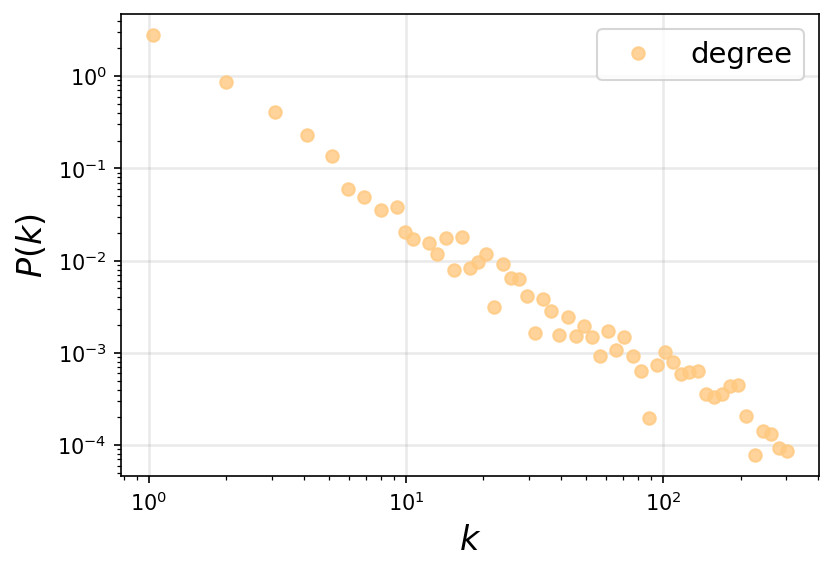

In [296]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.loglog(x1, y1,'o', color=cols[4], label='degree', alpha=0.8)
# ax.loglog(x2, y2,'s', color=cols[1], label='out-degree', alpha=0.8)


ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)

ax.legend(fontsize=14)

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

plt.show()

In [297]:
global_clustering_coefficient = nx.transitivity(airport_network)
print(global_clustering_coefficient)

0.38414344664491556


## Full randomisation of the airport network

In [266]:
rand_airport = nx.gnm_random_graph(nodes, edges)

rand_degree = rand_airport.degree()
rand_graph = nx.Graph()
rand_graph.add_edges_from(rand_degree)


rand_degree = dict(rand_degree)

In [267]:
rand_degree = list(rand_degree.values())
cols = ['#008795','#629CC0','#C8C0DD','#DEA8AB','#FFC980','#E3EA7A','#76C1CA','#999999']

In [268]:
def plot_degree(rand_degree, number_of_bins=50, log_binning=True, base=2):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.
    
    """
    
    # We need to define the support of our distribution
    lower_bound = min(rand_degree)
    upper_bound = max(rand_degree)
    
    # And the bins
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base = base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    # Then we can compute the histogram using numpy
    y, __ = np.histogram(rand_degree, 
                         bins=bins,
                         density=True)
    # Now, we need to compute for each y the value of x
    x = bins[1:] - np.diff(bins)/2.0
        
    return x, y

In [269]:
x1, y1 = plot_degree(rand_degree, number_of_bins=80, log_binning=True, base=2)

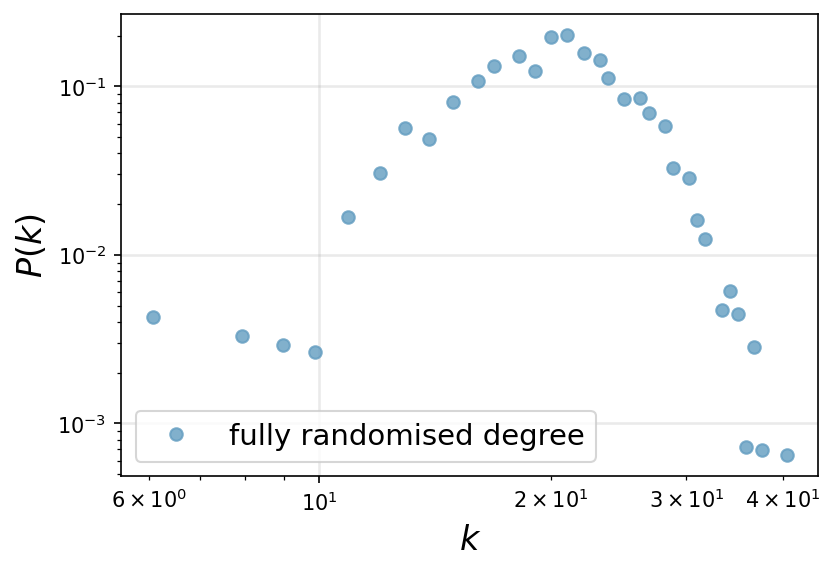

In [270]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.loglog(x1, y1,'o', color=cols[1], label='fully randomised degree', alpha=0.8)
# ax.loglog(x2, y2,'s', color=cols[1], label='out-degree', alpha=0.8)


ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)

ax.legend(fontsize=14)

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

plt.show()

In [271]:
global_clustering_coefficient_rand = nx.transitivity(rand_airport)
print(global_clustering_coefficient_rand)

0.014199940037622412


## Degree Preserving Randomization of the airport network

In [283]:
same_deg_airport = nx.double_edge_swap(airport_network, nswap=edges, max_tries=100*edges)

preserved_degree = same_deg_airport.degree()
preserved_graph = nx.Graph()
preserved_graph.add_edges_from(preserved_degree)


preserved_degree = dict(preserved_degree)

In [284]:
preserved_degree = list(preserved_degree.values())

In [285]:
def plot_degree(preserved_degree, number_of_bins=50, log_binning=True, base=2):
    """
    Given a degree sequence, return the y values (probability) and the
    x values (support) of a degree distribution that you're going to plot.
    
    """
    
    # We need to define the support of our distribution
    lower_bound = min(preserved_degree)
    upper_bound = max(preserved_degree)
    
    # And the bins
    if log_binning:
        log = np.log2 if base == 2 else np.log10
        lower_bound = log(lower_bound) if lower_bound >= 1 else 0.0
        upper_bound = log(upper_bound)
        bins = np.logspace(lower_bound,upper_bound,number_of_bins, base = base)
    else:
        bins = np.linspace(lower_bound,upper_bound,number_of_bins)
    
    # Then we can compute the histogram using numpy
    y, __ = np.histogram(preserved_degree, 
                         bins=bins,
                         density=True)
    # Now, we need to compute for each y the value of x
    x = bins[1:] - np.diff(bins)/2.0
        
    return x, y

In [286]:
x1, y1 = plot_degree(preserved_degree, number_of_bins=80, log_binning=True, base=2)

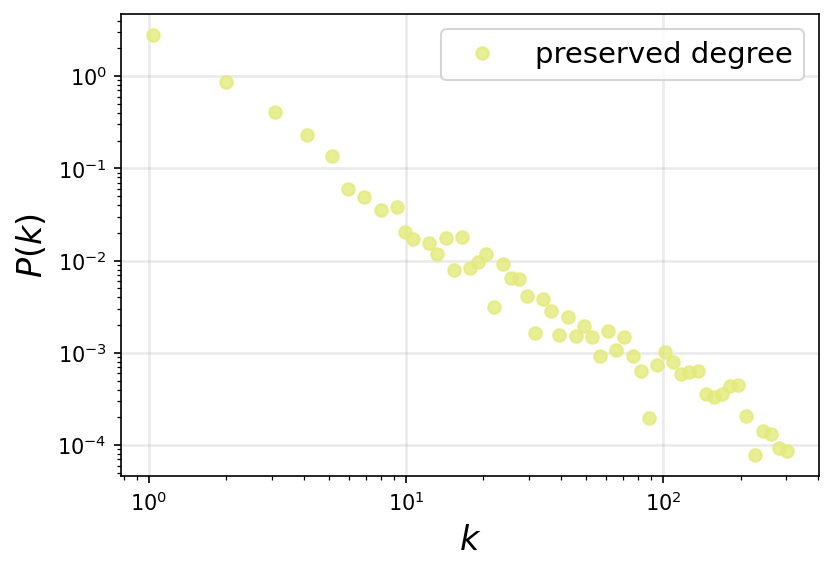

In [287]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.loglog(x1, y1,'o', color=cols[5], label='preserved degree', alpha=0.8)
# ax.loglog(x2, y2,'s', color=cols[1], label='out-degree', alpha=0.8)


ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)

ax.legend(fontsize=14)

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

plt.show()

In [288]:
preserved_global_clustering_coefficient = nx.transitivity(same_deg_airport)
print(preserved_global_clustering_coefficient)

0.23566570271652187


## Plotting all the degree distribution and comparing their global clustering coeffecients

In [278]:
x1, y1 = plot_degree(degree, number_of_bins=80, log_binning=True, base=2)
x2, y2 = plot_degree(rand_degree, number_of_bins=80, log_binning=True, base=2)
x3, y3 = plot_degree(preserved_degree, number_of_bins=80, log_binning=True, base=2)

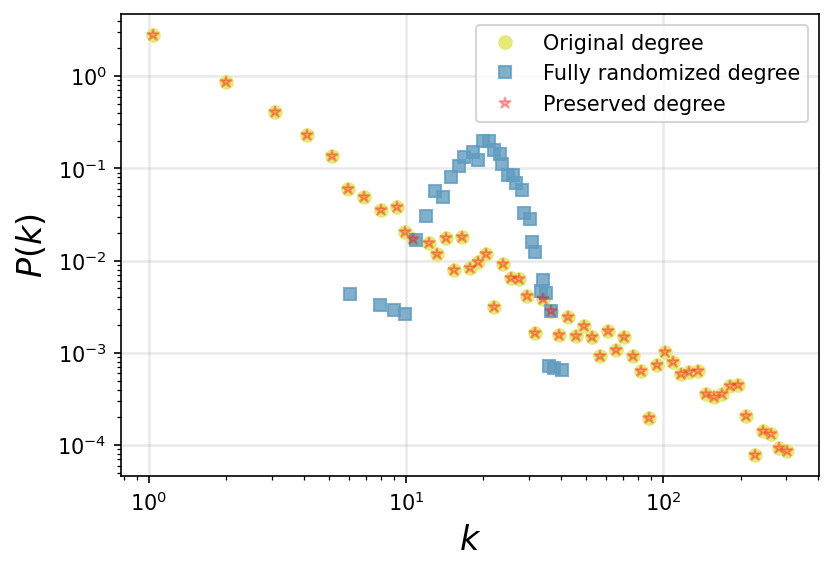

In [322]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,1,figsize=(6,4),dpi=150)

ax.loglog(x1, y1,'o', color=cols[5], label='Original degree', alpha=1)
ax.loglog(x2, y2,'s', color=cols[1], label='Fully randomized degree', alpha=0.8)
ax.loglog(x3, y3,'*', color='r', label='Preserved degree', alpha=0.3)



ax.set_xlabel(r"$k$", fontsize=16)
ax.set_ylabel(r"$P(k)$", fontsize=16)

ax.legend(fontsize=10)

ax.grid(linewidth=1.25, color='#999999', alpha=0.2, linestyle='-')

plt.show()

### The original degree and preserved degree distribution plots overlap since the degree of the network is preserved 

In [298]:
global_clustering_coefficient = nx.transitivity(airport_network)
global_clustering_coefficient_rand = nx.transitivity(rand_airport)
preserved_global_clustering_coefficient = nx.transitivity(same_deg_airport)

print("The global clustering coefficient of the original network is: ", global_clustering_coefficient)
print("The global clustering coefficient of a fullly randomised network is: ", global_clustering_coefficient_rand)
print("The global clustering coefficient of the degree preserved network is: ", preserved_global_clustering_coefficient)

The global clustering coefficient of the original network is:  0.38414344664491556
The global clustering coefficient of a fullly randomised network is:  0.014199940037622412
The global clustering coefficient of the degree preserved network is:  0.23566570271652187


#### Since the Global Clustering Coefficient signifies how connected a nodes neighbours are to one another we can see how a fully randomised network could potentially have fewer connected neighbours as it is completely random. The same logic would apply to a randomised network with the same degree as the original network since even though the degree is the same, the edges are randomly connected and hence we see a drop in the global clustering coefficient of the network.

## Recreating the Watts & Strogatz model

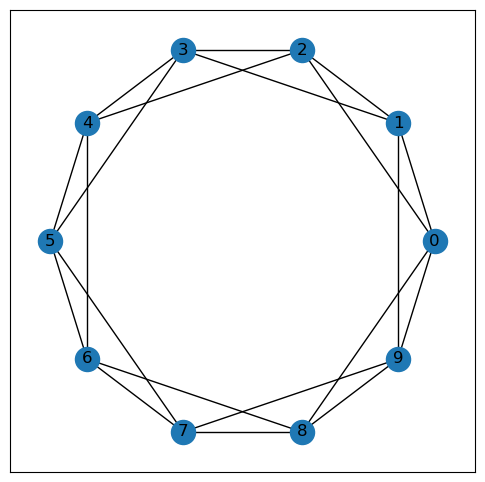

In [299]:
G = nx.watts_strogatz_graph(n=10, k=4, p=0)

pos = nx.circular_layout(G)
 
plt.figure(figsize = (6, 6))
nx.draw_networkx(G, pos)

Text(0.5, 1.0, 'Watts Strogatz Simulation')

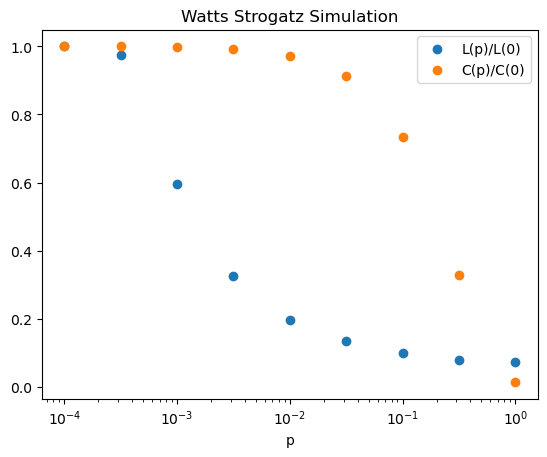

In [321]:
# Function to run the WS graph 
def run_ws_graph(n, k, p):
    ws = nx.watts_strogatz_graph(n, k, p)
    path_len = nx.average_shortest_path_length(ws)
    clustering_coef = nx.average_clustering(ws)
    return path_len, clustering_coef

# Our probability space and data points
ps = np.logspace(-4, 0, 9)


n = 1000
k = 10
iters = 20
res = []

# Running the graph for each probability value and averaging the results
for p in ps:
    ws_trials = [run_ws_graph(n, k, p) for _ in range(iters)]
    avg = np.array(ws_trials).mean(axis=0)
    res.append(avg)

# Converting the result to an array
result = np.array(res)

# Extracting average path length and clustering coefficients from the array
L, C = np.transpose(result)

# Regularising L and C by dividing them by the first element 
L /= L[0]
C /= C[0]


fig, ax = plt.subplots()
ax.scatter(ps, L)
ax.scatter(ps, C)
ax.set_xscale('log')
ax.set_xlabel('p')
ax.legend(['L(p)/L(0)', 'C(p)/C(0)'], loc = 'upper right')
ax.set_title('Watts Strogatz Simulation')

## Ignore the cell below, it's a personal reference for me to understand how I arrived at the solution above 

Text(0.5, 1.0, 'Watts Strogatz Simulation')

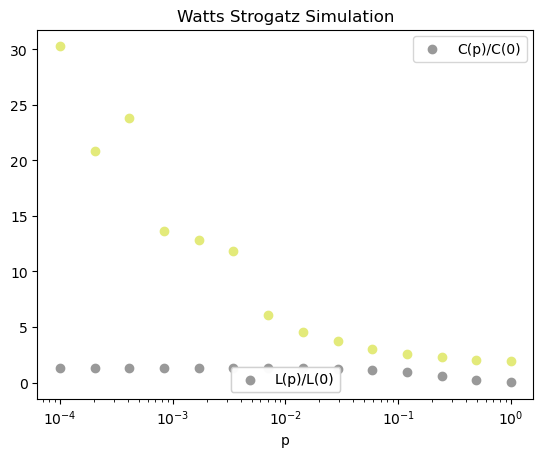

In [318]:
# ps = np.logspace(-4,0, 14)
# probabilities = np.logspace(-4,0, 14)  


# avg_clusterings = []
# avg_shortest_paths = []

# for p in probabilities:
#     ws_graph = nx.watts_strogatz_graph(n=1000, k=10, p=p)
#     avg_path_len = nx.average_shortest_path_length(ws_graph) 
#     clustering_coef = nx.average_clustering(ws_graph)
      
#     avg_shortest_paths.append(avg_path_len)
#     avg_clusterings.append(clustering_coef)

# normalised_shortest_path = [x/d0 for x in avg_shortest_paths]
# normalised_clustering = [j/c0 for j in avg_clusterings]



# fig, ax = plt.subplots()
# ax.scatter(ps, normalised_clustering, color = cols[7])
# ax.scatter(ps, normalised_shortest_path, color = cols[5])
# ax.set_xscale('log')
# ax.set_xlabel('p')
# legend1 = ax.legend(['C(p)/C(0)'], loc = 'upper right')
# fig.gca().add_artist(legend1)
# legend2 = ax.legend(['L(p)/L(0)'], loc = 'lower center')
# fig.gca().add_artist(legend2)
# ax.set_title('Watts Strogatz Simulation')

# plt.scatter(ps, normalised_clustering, color = 'r')
# plt.scatter(ps, normalised_shortest_path, color ='b')

# legend1 = plt.legend(['C(p)/C(0)'], loc = 'upper right')
# plt.gca().add_artist(legend1)
# plt.legend(['L(p)/L(0)'], loc = 'lower center')

# plt.xlabel('p')
# plt.set_xscale('log')
# plt.set_title('Watts Strogatz Simulation')